In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import matplotlib as plt
import pandas as pd
import numpy as np
from string import split
from pylab import *
from scipy import stats
import time
import calendar

In [3]:
# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("next_best_comm_data")
df = mydataset.get_dataframe(limit=1000000)

df = df.loc[df['email_year']==2019]
df_clicks = df.loc[df['click_flg']==True]

/data4/dataiku/condaenv/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
df_clicks.head(2)

,comm_id,master_id,data_source,channel_name,control_population,keycode,source_code,delivery_name,comm_drop_dt,email_dttm,email_date,email_year,email_month,email_day,email_hour,email_min,engagement,open_flg,open_dttm,open_date,open_day,open_hour,open_min,click_flg,click_dttm,click_date,click_day,click_hour,click_min,unsub_flg,unsub_dttm,unsub_date,unsub_day,unsub_hour,unsub_min,first_comm_date,next_delivery_date,time_since_previous_comm_days,time_since_previous_click_days,time_since_first_comm_days,delivery_count,email_history_count,product_related_campaign_flg,prod_motor_flg,prod_bike_flg,prod_home_flg,prod_travel_flg,prod_pa_flg,prod_van_flg,prod_boiler_flg,prod_term_flg,prod_cic_flg,prod_ip_flg,prod_wol_flg,prod_equity_flg,prod_pension_flg,prod_annuity_flg,prod_nonisa_flg,prod_isa_flg,prod_pmi_flg,prod_cancer_flg,total_products_targeted_per_campaign,cat_gi_campaign_flg,cat_lh_campaign_flg,cat_health_campaign_flg,cat_life_campaign_flg,cat_sr_campaign_flg,campaign_product_lv1_flg,campaign_product_lv2_flg,meta_combined,total_objectives_per_campaign,obj_onr_wa_flg,obj_nor_wa_flg,obj_ofr_wa_flg,obj_onr_up_flg,obj_nor_up_flg,obj_ofr_up_flg,obj_onr_xs_flg,obj_nor_xs_flg,obj_ofr_xs_flg,obj_onr_flg,obj_nor_flg,obj_ofr_flg,obj_wa_flg,obj_upsell_flg,obj_xsell_flg,obj_fup_flg,obj_acq_flg,obj_retention_flg,obj_csr_flg,obj_inlife_flg,obj_engagement_flg,obj_propositions_flg,obj_myavivaengagement_flg,obj_registration_flg,obj_newsletter_flg,obj_avivamisc_flg,mobile_device,scategory_url,campaign_name,program_name,communication_name,delivery_folder,business_unit,campaign_objective,...,matchback_sales_4wks_flg,matchback_sales_10wks_flg,matchback_sales_13wks_flg,matchback_sales_29wks_flg,matchback_sales_31wks_flg,matchback_sales_32wks_flg,matchback_sales_34wks_flg,matchback_quote_2wks_flg,matchback_quote_3wks_flg,matchback_quote_4wks_flg,matchback_quote_10wks_flg,matchback_quote_13wks_flg,matchback_quote_29wks_flg,matchback_quote_31wks_flg,matchback_quote_32wks_flg,matchback_quote_34wks_flg,days_to_sales,days_to_quotes,days_to_register,days_to_logon,prd_car_quote_flg,prd_car_sale_flg,prd_van_quote_flg,prd_van_sale_flg,prd_multivehicle_quote_flg,prd_multivehicle_sale_flg,prd_rescue_quote_flg,prd_rescue_sale_flg,prd_home_quote_flg,prd_home_sale_flg,prd_boiler_quote_flg,prd_boiler_sale_flg,prd_pet_quote_flg,prd_pet_sale_flg,prd_equity_quote_flg,prd_equity_sale_flg,prd_CIC_quote_flg,prd_CIC_sale_flg,prd_protection_quote_flg,prd_protection_sale_flg,prd_pmi_quote_flg,prd_pmi_sale_flg,prd_cancer_quote_flg,prd_cancer_sale_flg,prd_physio_quote_flg,prd_physio_sale_flg,prd_child_quote_flg,prd_child_sale_flg,prd_parent_quote_flg,prd_parent_sale_flg,prd_IP_quote_flg,prd_IP_sale_flg,prd_other_protection_quote_flg,prd_other_protection_sale_flg,prd_WOL_quote_flg,prd_WOL_sale_flg,prd_ISA_quote_flg,prd_ISA_sale_flg,prd_nonISA_quote_flg,prd_nonISA_sale_flg,prd_pension_quote_flg,prd_pension_sale_flg,prd_PA_quote_flg,prd_PA_sale_flg,prd_annuity_quote_flg,prd_annuity_sale_flg,prd_travel_quote_flg,prd_travel_sale_flg,frequency_1wk,frequency_1mth,frequency_12mth,sum_all_product_premium,sum_target_product_premium,MPH_increase_flg,total_sends,initial_send_date,last_send_date,mean_days_to_quote,mean_days_to_sale,mean_days_to_logon,mean_days_to_register,avg_premium_per_program_all_prds,avg_premium_per_program_target,months_since_active,openrr,clickrr,negativerr,positiverr,c2qr,quoterr,c2sr,salesrr,total_product_sales,prodsalerr,total_product_quotes,prodquoterr,logonrr,registerrr,multiprodrr,cluster_labels,ace_score,norm_ace_score,at_score,cluster_weighting,program_score
34,1221369055_1,200011243,ADOBE,EM,0.0,RN04_052019_K,RN04,RSD E4APR Annuity Eligible,2019-05-21,2019-05-21 09:17:33,2019-05-21,2019,5,Tue,9,17,positive,True,2019-05-21 12:30:56,2019-05-21,Tue,12.0,30.0,True,2019-05-21 12:30:56,2019-05-21,Tue,12.0,30.0,False,NaT,NaT,NaN,NaN,NaN,2018-08-01 14:08:02,2019-10-10 20:52:23.447,142,142.0,435,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,4,0,0,0,1,1,SnR,P,savings & reti

In [5]:
def rand_jitter(arr,factor):
    stdev = factor*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev 


def density_estimation(m1, m2):
    X, Y = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z


In [6]:
df = df.dropna(subset=['email_hour'])
df = df.dropna(subset=['email_day'])

In [8]:
factor = 0.075

days = {"Mon":7, "Tue":6, "Wed":5,"Thu":4,"Fri":3,"Sat":2,"Sun":1}

#All emails sent
y_email_mins = ((60*(df['email_hour']))+df['email_min']).as_matrix()
x_email_hours = (df['email_day'].map(days)-0.5).as_matrix()
#Email Clicked 
y_click_mins = ((60*(df_clicks['click_hour']))+df_clicks['click_min']).as_matrix()
x_click_hours = (df['click_day'].map(days)-0.5).as_matrix()

print len(y_click_mins)
print len(x_click_hours)

#print len(y_sys_mins[~numpy.isnan(y_click_mins)])
#print len(y_camp_mins[~numpy.isnan(y_camp_mins)])

5950
336651


/data4/dataiku/condaenv/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/data4/dataiku/condaenv/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/data4/dataiku/condaenv/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/data4/dataiku/condaenv/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


/data4/dataiku/condaenv/lib/python2.7/site-packages/matplotlib/contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/data4/dataiku/condaenv/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

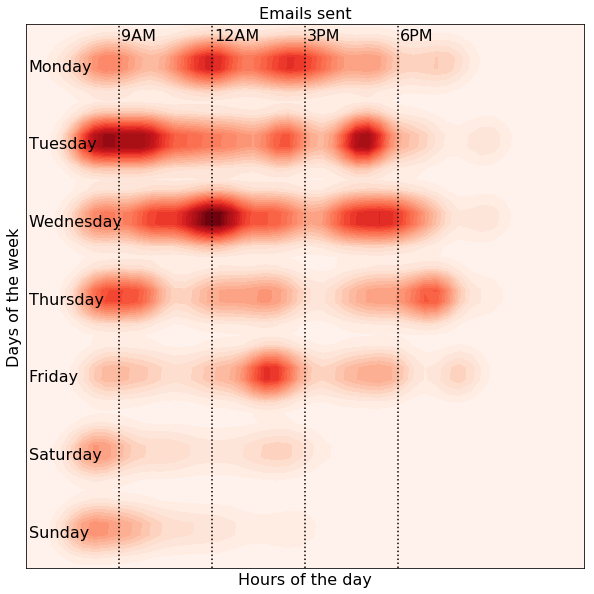

In [9]:
### PLOT  ###
plt.figure()
size = 16
f, (ax1) = plt.subplots(1, sharex=True, sharey=True, figsize=(10,10))

#Jitter
factor = 0.01

y_email_mins_jit = rand_jitter(y_email_mins,factor)
x_email_hours_jit = rand_jitter(x_email_hours,factor)

#Contours
n = 30
l = [1,2,3,4]

ymin, ymax, xmin, xmax = 0,7,360,1440
X_rho, Y_rho, Z_rho = density_estimation(y_email_mins_jit,x_email_hours_jit)
ax1.contourf(X_rho, Y_rho, Z_rho,n, cmap=plt.cm.Reds,linewidths=l)
ax1.plot(y_email_mins_jit,x_email_hours_jit, 'k.', markersize=2,alpha=0.001,label='Emails sent')

#Format plot
y_title, x_title = "Days of the week","Hours of the day"

ax1.set_ylabel(y_title,fontsize=size)
ax1.set_xlabel(x_title,fontsize=size)
ax1.tick_params(labelsize=size)
ax1.tick_params(axis='both',bottom='off',top='off',right='off',left='off',labelleft='off',labelbottom='off')
ax1.set_title('Emails sent',fontsize=size)
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])
ax1.annotate('Monday',xy=(365,6.4),fontsize=size)
ax1.annotate('Tuesday',xy=(365,5.4),fontsize=size)
ax1.annotate('Wednesday',xy=(365,4.4),fontsize=size)
ax1.annotate('Thursday',xy=(365,3.4),fontsize=size)
ax1.annotate('Friday',xy=(365,2.4),fontsize=size)
ax1.annotate('Saturday',xy=(365,1.4),fontsize=size)
ax1.annotate('Sunday',xy=(365,0.4),fontsize=size)
ax1.annotate('9AM',xy=(544,6.8),fontsize=size)
ax1.annotate('12AM',xy=(724,6.8),fontsize=size)
ax1.annotate('3PM',xy=(904,6.8),fontsize=size)
ax1.annotate('6PM',xy=(1084,6.8),fontsize=size)
#ax1.axhline(y=1,color='k',linestyle=':')
#ax1.axhline(y=2,color='k',linestyle=':')
#ax1.axhline(y=3,color='k',linestyle=':')
#ax1.axhline(y=4,color='k',linestyle=':')
#ax1.axhline(y=5,color='k',linestyle=':')
#ax1.axhline(y=6,color='k',linestyle=':')
ax1.axvline(x=540,color='k',linestyle=':')
ax1.axvline(x=720,color='k',linestyle=':')
ax1.axvline(x=900,color='k',linestyle=':')
ax1.axvline(x=1080,color='k',linestyle=':')

190400
190400


<Figure size 432x288 with 0 Axes>

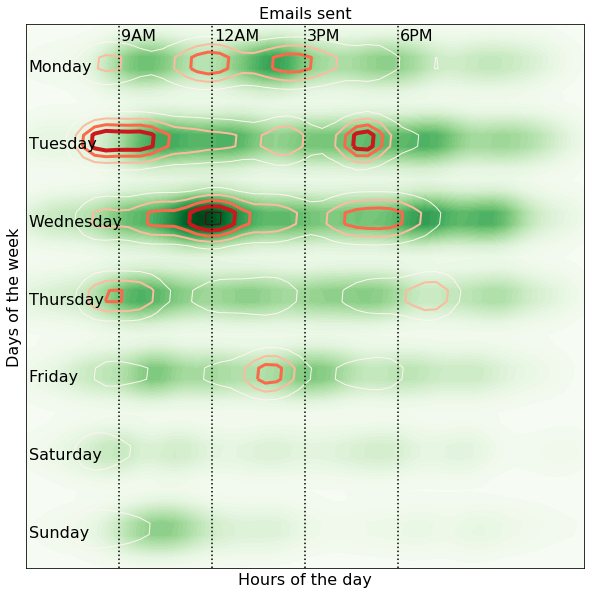

In [10]:
### PLOT  ###
plt.figure()
size = 16
f, (ax1) = plt.subplots(1, sharex=True, sharey=True, figsize=(10,10))

#Jitter
factor = 0.005

y_click_mins_jit = rand_jitter(y_click_mins[~numpy.isnan(y_click_mins)],factor).tolist()
x_click_hours_jit = rand_jitter(x_click_hours[~numpy.isnan(x_click_hours)],factor).tolist()

for i in range(5):
    y_click_mins_jit.extend(y_click_mins_jit)
    x_click_hours_jit.extend(x_click_hours_jit)

print len(y_click_mins_jit)
print len(x_click_hours_jit)

#Contours
n = 50
l = [1,2,3,4]

ymin, ymax, xmin, xmax = 0,7,360,1440

#Filled contours clicks
X_rho, Y_rho, Z_rho = density_estimation(y_click_mins_jit,x_click_hours_jit)
ax1.contourf(X_rho, Y_rho, Z_rho,n, cmap=plt.cm.Greens,linewidths=l)
ax1.plot(y_click_mins_jit,x_click_hours_jit, 'k.', markersize=2,alpha=0.001,label='Emails clicked')

#Contours Sends
n=5
X_rho, Y_rho, Z_rho = density_estimation(y_email_mins_jit,x_email_hours_jit)
ax1.contour(X_rho, Y_rho, Z_rho,n, cmap=plt.cm.Reds,linewidths=l)
ax1.plot(y_email_mins_jit,x_email_hours_jit, 'k.', markersize=2,alpha=0.0005,label='Emails sent')

#Format plot
y_title, x_title = "Days of the week","Hours of the day"

ax1.set_ylabel(y_title,fontsize=size)
ax1.set_xlabel(x_title,fontsize=size)
ax1.tick_params(labelsize=size)
ax1.tick_params(axis='both',bottom='off',top='off',right='off',left='off',labelleft='off',labelbottom='off')
ax1.set_title('Emails sent',fontsize=size)
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])
ax1.annotate('Monday',xy=(365,6.4),fontsize=size)
ax1.annotate('Tuesday',xy=(365,5.4),fontsize=size)
ax1.annotate('Wednesday',xy=(365,4.4),fontsize=size)
ax1.annotate('Thursday',xy=(365,3.4),fontsize=size)
ax1.annotate('Friday',xy=(365,2.4),fontsize=size)
ax1.annotate('Saturday',xy=(365,1.4),fontsize=size)
ax1.annotate('Sunday',xy=(365,0.4),fontsize=size)
ax1.annotate('9AM',xy=(544,6.8),fontsize=size)
ax1.annotate('12AM',xy=(724,6.8),fontsize=size)
ax1.annotate('3PM',xy=(904,6.8),fontsize=size)
ax1.annotate('6PM',xy=(1084,6.8),fontsize=size)
#ax1.axhline(y=1,color='k',linestyle=':')
#ax1.axhline(y=2,color='k',linestyle=':')
#ax1.axhline(y=3,color='k',linestyle=':')
#ax1.axhline(y=4,color='k',linestyle=':')
#ax1.axhline(y=5,color='k',linestyle=':')
#ax1.axhline(y=6,color='k',linestyle=':')
ax1.axvline(x=540,color='k',linestyle=':')
ax1.axvline(x=720,color='k',linestyle=':')
ax1.axvline(x=900,color='k',linestyle=':')
ax1.axvline(x=1080,color='k',linestyle=':')